**SKLEARN LIBRARY ALGORITHMS COMPARISON PROJECT**

The data set I used in this kernel is based on that of a bank's customers details.

The target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or s/he continues to be a customer.

In order to predict target variables, I will use sklearn classification algorithms:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification 
* Decision Tree Classification
* Random Forest Classification

After implementing each model, I used score and confusion matrix methods to compare models.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 


**IMPORTING DATASET**
This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [4]:
data = pd.read_csv('Churn_Modelling.csv')

**1. EXPLORATORY DATA ANALYSIS (EDA)**

First of all I need to understand and prepare my data set.

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


I don't need some of columns for my analysis, like customer ID, surname, etc.

In [7]:
data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1, inplace=True)

I will change customers' gender from Male/Female to 1/0.

In [8]:
data.Gender = [1 if each == 'Male' else 0 for each in data.Gender]

In [9]:
data.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7221,625,1,41,6,97663.16,2,1,0,57128.78,0
6862,586,1,33,9,0.00,1,1,0,6975.02,0
7952,746,0,33,2,107868.14,2,1,1,146192.40,0
8551,507,1,32,7,0.00,2,1,0,67926.18,0
6022,694,0,35,7,0.00,1,1,0,133570.43,1


**Question:** How many of the customers left the bank?

0    7963
1    2037
Name: Exited, dtype: int64

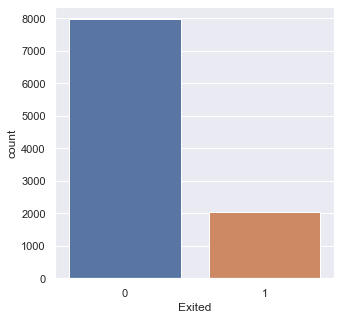

In [10]:
plt.figure(figsize=[5,5])
sns.set(style='darkgrid')
ax = sns.countplot(x='Exited', data=data)
data.loc[:,'Exited'].value_counts()

**2. SEPARETING FEATURES AND TARGET**

Now separete target feature (y) from other features (x_data).

In [11]:
y = data['Exited']
x = data.drop(['Exited'], axis=1)

In [12]:
x.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


I can see the x_data features has a large scale of numbers. So I need to normalize all the features between 0 and 1.

**3. NORMALIZATION PROCESS**

In [13]:
x = (x - np.min(x)) / (np.max(x)-np.min(x))
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


**4. SPLITTING DATA FOR TRAINING AND TESTING**

I am going to split my data set into as train (x_train, y_train) and test (x_test, y_test) datas.

Then I am going to teach my machine learning algorithms by using trainig data set.

Later I will use my trained model to predict my test data (y_pred).

Finally I will compare my predictions (y_pred) with my test data (y_test).

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

In [15]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (9000, 9)
y_train shape:  (9000,)
x_test shape:  (1000, 9)
y_test shape:  (1000,)


<AxesSubplot:>

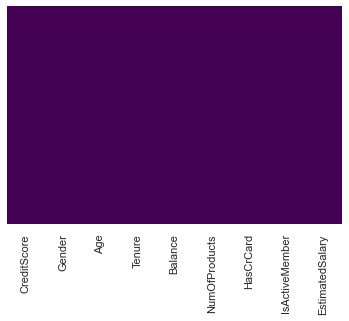

In [16]:
sns.heatmap(x_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing data :)

Now I can start inplying machine learning algorithms one by one.

**5. LOGISTIC REGRESSION CLASSIFICATION:**

In [44]:
from sklearn.linear_model import LogisticRegression

# Defining the model
lr = LogisticRegression()

# Training the model:
lr.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred0 = lr.predict(x_test)

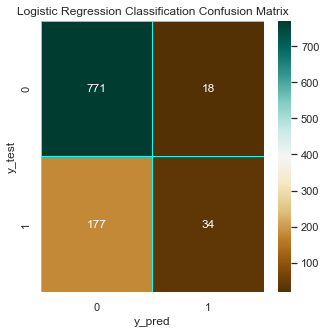

In [45]:
# Confusion matrix for visulalization of our prediction accuracy:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Creating the confusion matrix:
lr_cm = confusion_matrix(y_test, Predictions)

#Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [46]:
score_lr = lr.score(x_test, y_test)
print(score_lr)

0.805


In [47]:
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       789
           1       0.65      0.16      0.26       211

    accuracy                           0.81      1000
   macro avg       0.73      0.57      0.57      1000
weighted avg       0.78      0.81      0.75      1000



**6. KNN CLASSIFICATION ALGORITHM:**

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Defining the model with a k number of 13:
knn = KNeighborsClassifier(n_neighbors=13)

# Training the model:
knn.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred1 = knn.predict(x_test)

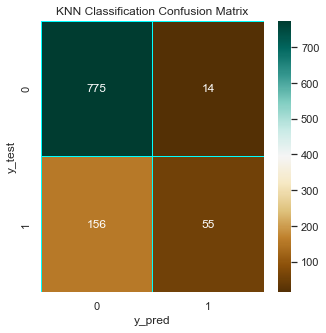

In [49]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
knn_cm = confusion_matrix(y_test, y_pred1)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [50]:
score_knn = knn.score(x_test, y_test)
print(score_knn)

0.83


In [51]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       789
           1       0.80      0.26      0.39       211

    accuracy                           0.83      1000
   macro avg       0.81      0.62      0.65      1000
weighted avg       0.82      0.83      0.79      1000



**7. SUPPORT VECTOR MACHINE (SVM) ALGORITHM:**

I will use the same x_train and y_train data sets to teach a SVM model. 

In [52]:
from sklearn.svm import SVC

# Defining SVM model
svm = SVC(random_state=2)

# Training model:
svm.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred2 = svm.predict(x_test)

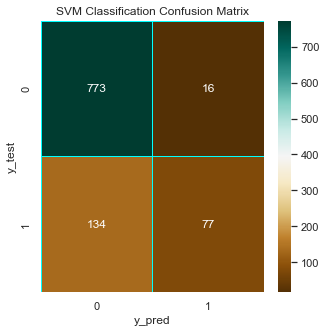

In [53]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
svm_cm = confusion_matrix(y_test, y_pred2)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [54]:
score_svm = svm.score(x_test, y_test)
print(score_svm)

0.85


In [55]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       789
           1       0.83      0.36      0.51       211

    accuracy                           0.85      1000
   macro avg       0.84      0.67      0.71      1000
weighted avg       0.85      0.85      0.83      1000



**8. NAIVE BAYES ALGORITHM:**

In [56]:
from sklearn.naive_bayes import GaussianNB

# Defining model:
nb = GaussianNB()

# Training the model:
nb.fit(x_train, y_train)

# Predicting:
y_pred3 = nb.predict(x_test)

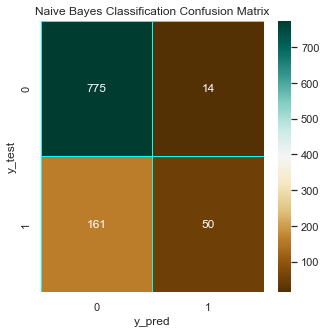

In [57]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
nb_cm = confusion_matrix(y_test, y_pred3)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nb_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [58]:
score_nb = nb.score(x_test, y_test)
print(score_nb)

0.825


In [59]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       789
           1       0.78      0.24      0.36       211

    accuracy                           0.82      1000
   macro avg       0.80      0.61      0.63      1000
weighted avg       0.82      0.82      0.79      1000



**9. DECISION TREE ALGORITHM:**

In [60]:
from sklearn.tree import DecisionTreeClassifier

# Defining the model:
dt = DecisionTreeClassifier()

# Training:
dt.fit(x_train, y_train)

# Predicting:
y_pred4 = dt.predict(x_test)

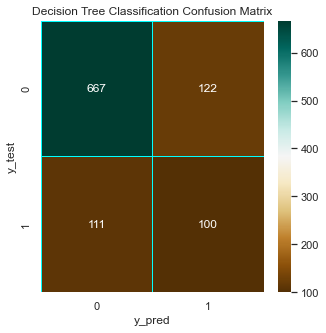

In [61]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
dt_cm = confusion_matrix(y_test, y_pred4)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dt_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [62]:
score_dt = dt.score(x_test, y_test)
print(score_dt)

0.767


In [63]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       789
           1       0.45      0.47      0.46       211

    accuracy                           0.77      1000
   macro avg       0.65      0.66      0.66      1000
weighted avg       0.77      0.77      0.77      1000



**10. RANDOM FOREST CLASSIFICATION ALGORITHM:**

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Defining:
rf = RandomForestClassifier(n_estimators=100, random_state=3)

# Training:
rf.fit(x_train, y_train)

# Predicting:
y_pred5 = rf.predict(x_test)

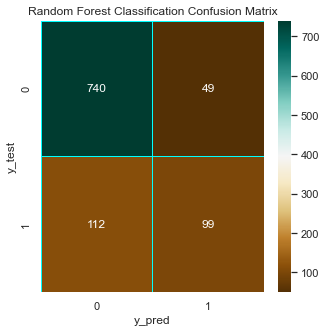

In [65]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
rf_cm = confusion_matrix(y_test, y_pred5)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [66]:
score_rf = rf.score(x_test, y_test)
print(score_rf)

0.839


In [67]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       789
           1       0.67      0.47      0.55       211

    accuracy                           0.84      1000
   macro avg       0.77      0.70      0.73      1000
weighted avg       0.83      0.84      0.83      1000



**11. COMPARISON OF ALGORITHMS:**

Now it's time to compare our models. 

First of all compare the accuracies:

In [68]:
data_scores = pd.Series([score_lr, score_knn, score_svm, score_nb, score_dt, score_rf], 
                        index=['logistic_regression_score', 'knn_score', 'svm_score', 'naive_bayes_score', 'decision_tree_score', 'random_forest_score']) 
data_scores

logistic_regression_score    0.805
knn_score                    0.830
svm_score                    0.850
naive_bayes_score            0.825
decision_tree_score          0.767
random_forest_score          0.839
dtype: float64

From the accuracy comparison I can see random forest classification gave the best result.

Now I want to see y_test and my models' y_pred values manually:

In [69]:
d = {'y_test': y_test, 'log_reg_pred': y_pred0,'knn_prediction': y_pred1, 
     'svm_prediction': y_pred2, 'naive_bayes_prediction': y_pred3, 
     'decision_tree_prediction': y_pred4, 'random_forest_prediction': y_pred5}
data01 = pd.DataFrame(data=d)
data01.T

,6676,6421,9834,8492,9982,8844,7247,5862,3662,3457,...,5360,8914,8947,7638,3813,5544,1922,2877,9056,6666
y_test,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
log_reg_pred,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
knn_prediction,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
svm_prediction,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
naive_bayes_prediction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
decision_tree_prediction,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
random_forest_prediction,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


Finally I want to show my models' confusion matrixes side by side:

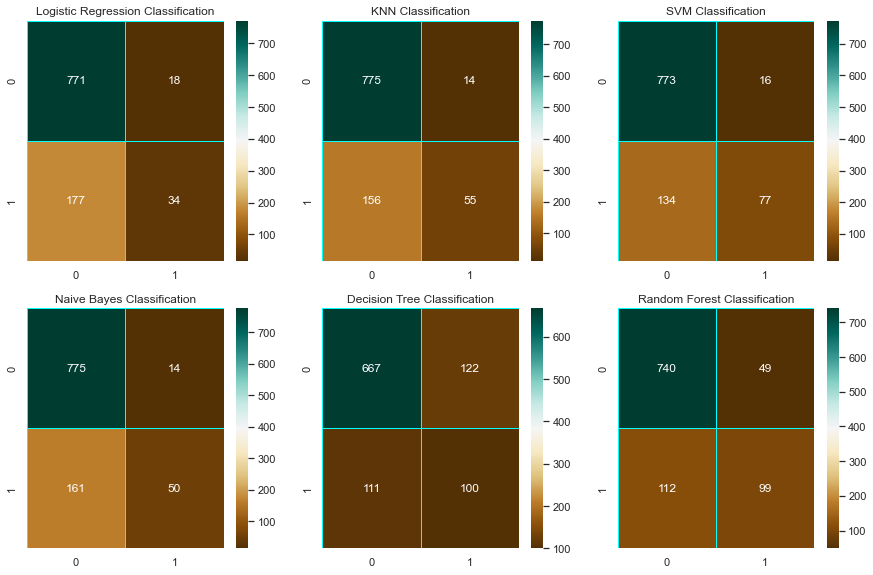

In [70]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('Logistic Regression Classification')

ax2 = fig.add_subplot(3, 3, 2) # row, column, position
ax2.set_title('KNN Classification')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('SVM Classification')

ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Naive Bayes Classification')

ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Decision Tree Classification')

ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Random Forest Classification')

sns.heatmap(data=lr_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax1, cmap='BrBG')
sns.heatmap(data=knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax2, cmap='BrBG')   
sns.heatmap(data=svm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax3, cmap='BrBG')
sns.heatmap(data=nb_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax4, cmap='BrBG')
sns.heatmap(data=dt_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax5, cmap='BrBG')
sns.heatmap(data=rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax6, cmap='BrBG')
plt.show()

**Thank You**